## CA1 Data Preparation

### Import Libraries for performing data cleaning, analysis and visualizations. 

In [1]:
import pandas as pd   ##data analysis and manipulations tool 
import seaborn as sns  ##Visualization Library 
import numpy as np      ##Numerical python tool
import matplotlib.pyplot as plt   ##Visualization tool 
from sklearn.decomposition import PCA   ##Scikit-Learn, analytical library 

sns.set() #Using Seaborn graphics for all my visualizations

In [2]:
aps_df = pd.read_csv('aps_failure_set_CA1.csv')

### Visualizing head and tail of my dataset

In [3]:
aps_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### Here, there is some information abour my dataset
### e.g: index of dtypes and columns, non-null values, memory usage  (The Pandas Development Team, 2022)

#### Because there is 170 columns as object dtype, in the code (.describe) below it shows up just one column of my dataset which is int64. 

In [4]:
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [5]:
aps_df.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


## Identifying missing values in my dataset  (Mckinney, 2017)
### The missing values are not identified because 'na' is not recognized on Pandas

In [6]:
aps_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

### As Pandas fail to identify missing values such as 'na', It has been added on pd.read(), 
### Then it will be recognized as a corrupt value      (GeeksforGeeks, 2019)

In [7]:
miss_val_formats =['na']
aps_df=pd.read_csv("aps_failure_set_CA1.csv", na_values=miss_val_formats)

### Now I have below the information of my dataset after identifying the missing values na.
### I have dtypes: float64, int64 and object
### Range index of 60000

In [8]:
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


### There is also information about the min value in each colum
### max value, mean, medium, standard deviation, total count of observations 

In [9]:
aps_df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [10]:
aps_df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [11]:
aps_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [12]:
aps_df['class'].unique()

array(['neg', 'pos'], dtype=object)

### I have replaced the strings values in the column 'class' for numbers 0 and 1 

In [13]:
aps_df['class'].replace('neg', 0, inplace = True)
aps_df['class'].replace('pos', 1, inplace = True)

In [14]:
aps_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


### I have chosen my label/target for prediction purpose, which is the column 'class' 

In [15]:
label = aps_df['class']

label.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [16]:
aps_no_class = aps_df.drop(columns = ["class"]) 

In [17]:
aps_no_class.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


### In order to deal with the missing data, It has been used the dropna method
### However, this method will not be used as it will be reducing a lot of my dataset.

In [18]:
new_df = aps_no_class.dropna()

In [19]:
new_df.isnull().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

In [20]:
new_df.shape

(591, 170)

In [21]:
new_df = aps_no_class.dropna(axis=1)  ## To drop columns cointaining missing values 

In [22]:
new_df.shape

(60000, 1)

### Filling missing data 
### Below I have experimented differents 'fillna' methods, filling the missing values with the fillna(0), mean and median



In [23]:
new_aps = aps_no_class.fillna(0)

In [24]:
new_aps.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [25]:
mean_value = aps_no_class.mean()
mean_imputation = aps_no_class.fillna(mean_value)

In [26]:
mean_imputation.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [27]:
median_value = aps_no_class.median()
median_imputation = aps_no_class.fillna(median_value)

In [28]:
median_imputation.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


### Below I have tried to use a code to plot all methods that I used to handle the missing data, then I would compare which one is the closest to the original's distribution data. 
### However, I have not identified which imputation would be the best option for my dataset because they overlap each other. 
### I presume because my dataset has been not scaled. I was not able to figure it out. 

<Axes: ylabel='Density'>

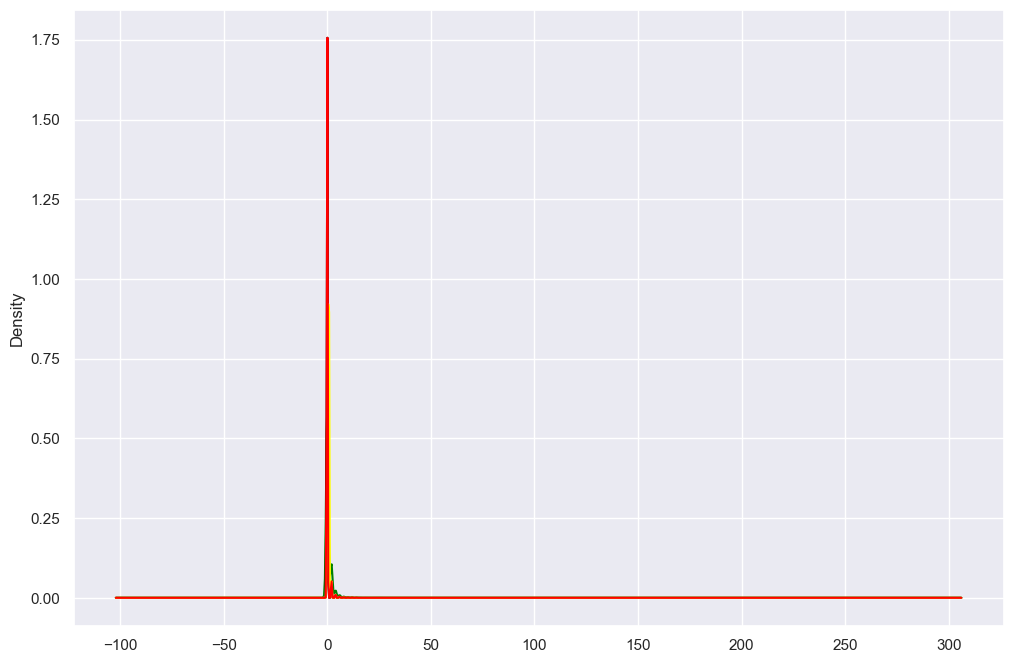

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

aps_no_class['ab_000'].plot(kind='kde', color='green')
new_aps['ab_000'].plot(kind='kde', color='black')
mean_imputation["ab_000"].plot(kind='kde',color='yellow')
median_imputation["ab_000"].plot(kind='kde',color='red')


### Because I could not figure out which imputation to consider in order to progress with my analysis, I have picked the method 'fillna(0)' as my best choice. 

### I have used PCA(Principal Component Analysis) to reduce the dimentionality of my dataset.
### PCA will find the best pattern (principal axes) in my dataset and use it to describe the whole dataset
### PCA will create new features of the dataset, retaining the most important information for analysis. 

In [30]:
pca = PCA(n_components=170)
pca.fit(new_aps) 

 

PCA(n_components=170)

Text(0, 0.5, 'cumulated explained variance')

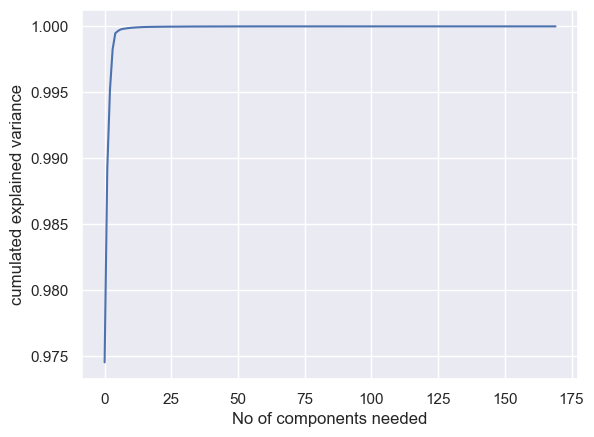

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components needed")
plt.ylabel("cumulated explained variance")


### I have chosen the number of 10 components that I believe would capture the most variance in the dataset, according to the plot above.

In [32]:
pca = PCA(n_components=10)
n_components=10
projected = pca.fit_transform(new_aps)
print(new_aps.shape) 
print(projected.shape) 


(60000, 170)
(60000, 10)


In [33]:
aps_pca = pd.DataFrame(projected, columns=['PC'+ str(i + 1) for i in range(n_components)])

In [34]:
aps_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.794496e+09,3.211523e+05,-13914.100755,3.221798e+06,1.246086e+07,5.302119e+06,-3.443515e+05,9.257056e+04,-1.213335e+06,2.904779e+06
1,-3.361937e+08,-5.375804e+06,-284084.983414,-6.810371e+06,-1.193847e+05,2.457512e+06,-2.267203e+05,-1.313286e+06,1.005464e+06,-8.059593e+05
2,-3.361927e+08,-5.608250e+06,-277150.003558,-1.020018e+07,-1.375904e+06,-1.456393e+06,8.431763e+05,1.618961e+05,-1.477105e+06,6.712679e+05
3,-3.361710e+08,-6.252036e+06,-263685.285444,-1.471480e+07,-8.833286e+06,-7.683078e+05,2.695536e+05,-2.691088e+05,5.879196e+05,-1.123004e+06
4,-3.362444e+08,-4.891118e+06,-310272.149219,1.014545e+07,-5.099864e+06,-2.738365e+06,1.926148e+06,7.931166e+05,-6.081122e+04,1.631404e+06


In [35]:
aps_pca['class'] = aps_df['class']

In [36]:
aps_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,class
0,1.794496e+09,3.211523e+05,-13914.100755,3.221798e+06,1.246086e+07,5.302119e+06,-3.443515e+05,9.257056e+04,-1.213335e+06,2.904779e+06,0
1,-3.361937e+08,-5.375804e+06,-284084.983414,-6.810371e+06,-1.193847e+05,2.457512e+06,-2.267203e+05,-1.313286e+06,1.005464e+06,-8.059593e+05,0
2,-3.361927e+08,-5.608250e+06,-277150.003558,-1.020018e+07,-1.375904e+06,-1.456393e+06,8.431763e+05,1.618961e+05,-1.477105e+06,6.712679e+05,0
3,-3.361710e+08,-6.252036e+06,-263685.285444,-1.471480e+07,-8.833286e+06,-7.683078e+05,2.695536e+05,-2.691088e+05,5.879196e+05,-1.123004e+06,0
4,-3.362444e+08,-4.891118e+06,-310272.149219,1.014545e+07,-5.099864e+06,-2.738365e+06,1.926148e+06,7.931166e+05,-6.081122e+04,1.631404e+06,0


### After implementing PCA, we can see the number of observations still the same, despite the reduced amount of columns. 
### Also the memory usage has been reduced too. 

In [37]:
aps_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     60000 non-null  float64
 1   PC2     60000 non-null  float64
 2   PC3     60000 non-null  float64
 3   PC4     60000 non-null  float64
 4   PC5     60000 non-null  float64
 5   PC6     60000 non-null  float64
 6   PC7     60000 non-null  float64
 7   PC8     60000 non-null  float64
 8   PC9     60000 non-null  float64
 9   PC10    60000 non-null  float64
 10  class   60000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 5.0 MB


### Preparing the data for Training and Test steps

In [38]:
from sklearn.model_selection import train_test_split
X = aps_pca.iloc[:,0:10]
y = aps_pca.iloc[:,10]


In [39]:
X.shape, y.shape

((60000, 10), (60000,))

In [40]:
print(X,y)

                PC1           PC2            PC3           PC4           PC5  \
0      1.794496e+09  3.211523e+05  -13914.100755  3.221798e+06  1.246086e+07   
1     -3.361937e+08 -5.375804e+06 -284084.983414 -6.810371e+06 -1.193847e+05   
2     -3.361927e+08 -5.608250e+06 -277150.003558 -1.020018e+07 -1.375904e+06   
3     -3.361710e+08 -6.252036e+06 -263685.285444 -1.471480e+07 -8.833286e+06   
4     -3.362444e+08 -4.891118e+06 -310272.149219  1.014545e+07 -5.099864e+06   
...             ...           ...            ...           ...           ...   
59995 -3.364199e+08 -2.457138e+06 -415694.435045  7.192584e+07 -1.089942e+07   
59996  1.794511e+09 -1.373746e+06   20155.983677 -7.800156e+06 -6.727554e+06   
59997  1.794512e+09 -1.429219e+06   22479.382890 -9.193486e+06 -6.593671e+06   
59998  1.794448e+09  9.781449e+05  -63584.040586  3.726327e+07 -3.386379e+06   
59999 -3.362756e+08 -4.894499e+06 -328713.944547  2.487751e+07 -1.621831e+07   

                PC6           PC7      

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)



In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48000, 10), (12000, 10), (48000,), (12000,))

In [43]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [44]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [45]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.875375 (0.035952)
KNN: 0.985396 (0.001282)
CART: 0.982375 (0.000840)
NB: 0.959667 (0.004290)


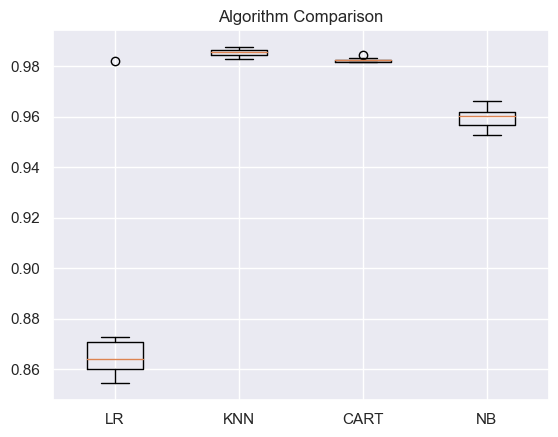

In [46]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [47]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [48]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9858333333333333
[[11758    51]
 [  119    72]]


## Conclusion: 

### I have not been able to scale the data and it will definetely have an impact on the final results of my model training. That means that the accuracy and predictions of this analysis is not reliable.